In [105]:
def build_download_url(
    api_key,
    ticker,
    start_date,
    end_date,
    sampling_interval,
    after_hours
):
    """Documentation: https://www.tiingo.com/documentation/iex"""

    start_date_str= start_date.strftime("%Y-%m-%d")
    end_date_str= end_date.strftime("%Y-%m-%d")
    after_hours_str= "true" if after_hours else "false"

    return (
        f"https://api.tiingo.com/iex/{ticker}/prices?"
        f"token={api_key}&"
        f"startDate={start_date_str}&"
        f"endDate={end_date_str}&"
        f"resampleFreq={sampling_interval}min&"
        f"afterHours={after_hours_str}&"
        f"format=csv"
    )

In [106]:
from datetime import datetime, timedelta
import requests

def download_ticker(
    api_key: str,
    ticker: str,
    start_date : datetime,
    end_date : datetime,
    sampling_interval: int,
    after_hours: bool,
):
    url = build_download_url(
        api_key, 
        ticker, 
        start_date, 
        end_date, 
        sampling_interval, 
        after_hours)
    
    print(
        f"Retrieving {ticker} from {start_date} to {end_date} on {sampling_interval}m - {url}"
    )

    return make_request_with_retry(url)


def make_request_with_retry(url, retries=5, delay=1):
    headers = {"Content-Type": "application/json"}
    for attempt in range(retries + 1):
        try:
            response = requests.get(url, headers)
            response.raise_for_status()  # Raise an exception for non-2xx responses
            return response.text
        except requests.RequestException as e:
            if response.status_code == 404:
                print(f"404 error: {e}")
                return None
            if attempt < retries:
                print(f"Transient error occurred. Retrying in {delay} seconds...")
                time.sleep(delay)
                delay *= 2  # Exponential backoff
            else:
                print(f"Error: {e}")
                raise

In [107]:
import matplotlib.pyplot as plt
import importlib

import classes_calc

# Reload the module when changes are made
importlib.reload(classes_calc)

<module 'classes_calc' from 'C:\\Users\\User\\AAAMio\\Projects\\PyTorch\\riga_stock_nn\\classes_calc.py'>

In [189]:
# Ginkgo Bioworks went public on the New York Stock Exchange via a SPAC merger on September 17, 2021
csv_data2022_1= download_ticker("REMOVED_SECRET", "DNA", datetime(2022, 1, 1), datetime(2022, 5,28), 5, False)
csv_data2022_2= download_ticker("REMOVED_SECRET", "DNA", datetime(2022, 5,28), datetime(2022, 9,24), 5, False)
csv_data2022_3= download_ticker("REMOVED_SECRET", "DNA", datetime(2022, 9,24), datetime(2023, 1, 1), 5, False)
csv_data2023_1= download_ticker("REMOVED_SECRET", "DNA", datetime(2023, 1, 1), datetime(2023, 5,27), 5, False)
csv_data2023_2= download_ticker("REMOVED_SECRET", "DNA", datetime(2023, 5,27), datetime(2023, 9,30), 5, False)
csv_data2023_3= download_ticker("REMOVED_SECRET", "DNA", datetime(2023, 9,30), datetime(2023,11,30), 5, False)

Retrieving DNA from 2022-01-01 00:00:00 to 2022-05-28 00:00:00 on 5m - https://api.tiingo.com/iex/DNA/prices?token=REMOVED_SECRET&startDate=2022-01-01&endDate=2022-05-28&resampleFreq=5min&afterHours=false&format=csv
Retrieving DNA from 2022-05-28 00:00:00 to 2022-09-24 00:00:00 on 5m - https://api.tiingo.com/iex/DNA/prices?token=REMOVED_SECRET&startDate=2022-05-28&endDate=2022-09-24&resampleFreq=5min&afterHours=false&format=csv
Retrieving DNA from 2022-09-24 00:00:00 to 2023-01-01 00:00:00 on 5m - https://api.tiingo.com/iex/DNA/prices?token=REMOVED_SECRET&startDate=2022-09-24&endDate=2023-01-01&resampleFreq=5min&afterHours=false&format=csv
Retrieving DNA from 2023-01-01 00:00:00 to 2023-05-27 00:00:00 on 5m - https://api.tiingo.com/iex/DNA/prices?token=REMOVED_SECRET&startDate=2023-01-01&endDate=2023-05-27&resampleFreq=5min&afterHours=false&format=csv
Retrieving DNA from 2023-05-27 00:00:00 to 2023-09-30 00:00:00 on 5m - https://api.tiingo.com/iex/DNA/prices?token=REMOVED_SECRET&startD

In [190]:
csv_data2023_3

'date,close,high,low,open,volume\n2023-10-02 09:30:00-04:00,1.805,1.805,1.775,1.8,6167.0\n2023-10-02 09:35:00-04:00,1.805,1.815,1.79,1.805,14538.0\n2023-10-02 09:40:00-04:00,1.795,1.81,1.78,1.805,7014.0\n2023-10-02 09:45:00-04:00,1.775,1.8,1.775,1.795,3227.0\n2023-10-02 09:50:00-04:00,1.77,1.775,1.76,1.775,34035.0\n2023-10-02 09:55:00-04:00,1.785,1.785,1.765,1.765,6679.0\n2023-10-02 10:00:00-04:00,1.795,1.805,1.77,1.77,10692.0\n2023-10-02 10:05:00-04:00,1.785,1.795,1.785,1.795,28944.0\n2023-10-02 10:10:00-04:00,1.785,1.785,1.785,1.785,1600.0\n2023-10-02 10:15:00-04:00,1.785,1.785,1.78,1.785,1200.0\n2023-10-02 10:20:00-04:00,1.785,1.785,1.78,1.785,5318.0\n2023-10-02 10:25:00-04:00,1.785,1.785,1.785,1.785,600.0\n2023-10-02 10:30:00-04:00,1.79,1.805,1.785,1.785,1800.0\n2023-10-02 10:35:00-04:00,1.795,1.795,1.79,1.795,200.0\n2023-10-02 10:40:00-04:00,1.805,1.805,1.795,1.795,2000.0\n2023-10-02 10:45:00-04:00,1.805,1.81,1.805,1.805,5559.0\n2023-10-02 10:50:00-04:00,1.795,1.81,1.795,1.805,709

In [191]:
import io
import pandas as pd

df2022_1 = pd.read_csv(io.StringIO(csv_data2022_1))
print(f"df2022_1 first: {df2022_1.iloc[0]} last: {df2022_1.iloc[-1]}")
df2022_2 = pd.read_csv(io.StringIO(csv_data2022_2))
print(f"df2022_2 first: {df2022_2.iloc[0]} last: {df2022_2.iloc[-1]}")
df2022_3 = pd.read_csv(io.StringIO(csv_data2022_3))
print(f"df2022_3 first: {df2022_3.iloc[0]} last: {df2022_3.iloc[-1]}")
df2023_1 = pd.read_csv(io.StringIO(csv_data2023_1))
print(f"df2023_1 first: {df2023_1.iloc[0]} last: {df2023_1.iloc[-1]}")
df2023_2 = pd.read_csv(io.StringIO(csv_data2023_2))
print(f"df2023_2 first: {df2023_2.iloc[0]} last: {df2023_2.iloc[-1]}")
df2023_3 = pd.read_csv(io.StringIO(csv_data2023_3))
print(f"df2023_3 first: {df2023_3.iloc[0]} last: {df2023_3.iloc[-1]}")
df = pd.concat([df2022_1, df2022_2, df2022_3, df2023_1, df2023_2, df2023_3], axis=0, ignore_index=True)

df2022_1 first: date      2022-01-03 09:30:00-05:00
close                         8.235
high                          8.385
low                            8.18
open                          8.385
volume                        100.0
Name: 0, dtype: object last: date      2022-05-27 15:55:00-04:00
close                           3.2
high                           3.21
low                            3.19
open                            3.2
volume                      24255.0
Name: 8189, dtype: object
df2022_2 first: date      2022-05-31 09:30:00-04:00
close                         3.135
high                          3.225
low                            3.13
open                          3.225
volume                      21794.0
Name: 0, dtype: object last: date      2022-09-23 15:55:00-04:00
close                         2.805
high                          2.805
low                           2.795
open                          2.795
volume                      25550.0
Name: 6551, dtype: o

In [192]:
close_list = df['close'].astype(float).tolist()

print(f"df First: {df[:10]}")
print(f"close First: {close_list[:10]}")
print(f"df Last: {df[-10:]}")
print(f"close Last: {close_list[-10:]}")

df First:                         date  close   high    low   open  volume
0  2022-01-03 09:30:00-05:00  8.235  8.385  8.180  8.385   100.0
1  2022-01-03 09:35:00-05:00  8.260  8.260  8.140  8.190  1668.0
2  2022-01-03 09:40:00-05:00  8.080  8.185  8.080  8.185     0.0
3  2022-01-03 09:45:00-05:00  7.980  8.060  7.980  8.060  2000.0
4  2022-01-03 09:50:00-05:00  8.115  8.190  7.960  7.960   600.0
5  2022-01-03 09:55:00-05:00  8.170  8.190  8.085  8.110  2413.0
6  2022-01-03 10:00:00-05:00  8.375  8.380  8.170  8.170  9288.0
7  2022-01-03 10:05:00-05:00  8.240  8.360  8.225  8.360  5097.0
8  2022-01-03 10:10:00-05:00  8.340  8.350  8.250  8.285  1520.0
9  2022-01-03 10:15:00-05:00  8.310  8.390  8.300  8.325  2454.0
close First: [8.235, 8.26, 8.08, 7.98, 8.115, 8.17, 8.375, 8.24, 8.34, 8.31]
df Last:                             date  close   high    low   open   volume
38678  2023-11-30 15:10:00-05:00  1.320  1.325  1.315  1.320   1897.0
38679  2023-11-30 15:15:00-05:00  1.320  1.325  1

In [202]:
classes_window= 80
down_pcts= [5]
up_pcts= [7]
calculator = classes_calc.ClassesCalc(classes_window, down_pcts, up_pcts)

In [203]:
classes= calculator.calculate(close_list)
print(classes[-classes_window-1:-classes_window+1])

[0, nan]


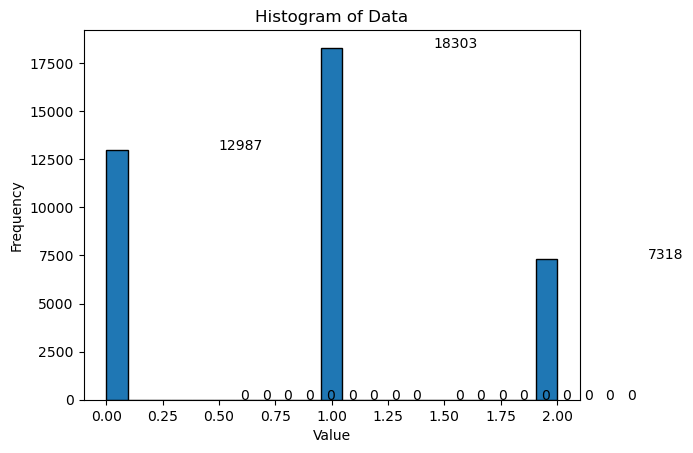

In [204]:
import matplotlib.pyplot as plt

# Create a histogram
hist_values, bin_edges, _ = plt.hist(classes, bins=21, edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Display frequency on top of each bar
for value, edge in zip(hist_values, bin_edges[:-1]):
    plt.text(edge + 0.5, value + 0.1, str(int(value)), color='black')
    
# Show the histogram
plt.show()


In [205]:
from collections import Counter

@staticmethod
def display_frequency_numbers(classes):
    # Calculate the frequency of each element
    frequency_dict = Counter(classes)
    
    # Print the result
    num_ticks= len(classes)
    print(f"Total: {num_ticks}")
    for element, frequency in frequency_dict.items():
        percent=0
        position= element - len(down_pcts)
        if position < 0:
            percent= -1 * down_pcts[-1 * position - 1] 
        elif position > 0:
            percent= up_pcts[position - 1]
            
        print(f"{(frequency/num_ticks*100):>6.2f}% {frequency:>6} times {percent:>3}% change ({element})")

display_frequency_numbers(classes)

Total: 38688
 47.31%  18303 times   0% change (1)
 18.92%   7318 times   7% change (2)
 33.57%  12987 times  -5% change (0)
  0.21%     80 times   0% change (nan)


In [206]:
import importlib

import signals_calc

# Reload the module when changes are made
importlib.reload(signals_calc)

signal_windows= [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
signals_calculator = signals_calc.SignalsCalc(signal_windows)

windows_rolling_avg = signals_calculator.calculate(close_list)
windows_rolling_avg

[[nan,
  8.247499999999999,
  8.169999999999998,
  8.029999999999998,
  8.047499999999998,
  8.142499999999998,
  8.272499999999997,
  8.307499999999997,
  8.289999999999997,
  8.324999999999998,
  8.489999999999998,
  8.61,
  8.5575,
  8.532499999999999,
  8.48,
  8.4275,
  8.434999999999999,
  8.497499999999999,
  8.544999999999998,
  8.594999999999999,
  8.572499999999998,
  8.54,
  8.587499999999999,
  8.594999999999999,
  8.594999999999999,
  8.59,
  8.57,
  8.585,
  8.580000000000002,
  8.570000000000002,
  8.575000000000003,
  8.572500000000002,
  8.557500000000001,
  8.540000000000001,
  8.535,
  8.555,
  8.57,
  8.56,
  8.565000000000001,
  8.565000000000001,
  8.560000000000002,
  8.577500000000002,
  8.575000000000003,
  8.572500000000002,
  8.557500000000001,
  8.5275,
  8.524999999999999,
  8.5275,
  8.5425,
  8.56,
  8.555,
  8.565,
  8.552499999999998,
  8.529999999999998,
  8.554999999999996,
  8.572499999999996,
  8.574999999999996,
  8.579999999999995,
  8.55999999999

In [207]:
print(len(close_list))
print(len(windows_rolling_avg[len(signal_windows)-1]))


38688
38688


In [208]:
from typing import List

@staticmethod
def calculate_price_proportions(prices: List[float], averages_list: List[List[float]]) -> List[List[float]]:
    list_of_list_proportions= []
    for averages in averages_list:
        list_proportions= []
        for idx in range(len(averages)):
            list_proportions.append((prices[idx]-averages[idx])/prices[idx])

        list_of_list_proportions.append(list_proportions)

    return list_of_list_proportions

In [209]:
proportions= calculate_price_proportions(close_list, windows_rolling_avg)


In [210]:
print(close_list[-10:])
print(windows_rolling_avg[0][-10:])
print(proportions[0][-10:])
current_sum = sum(close_list[-2:])/2
classes_len= len(classes)
signal_windows_len= len(signal_windows)

print(f"Signal window last: {signal_windows[-1]} len: {signal_windows_len}")
print(f"Classes last non-nan: {classes[-classes_window-1:-classes_window+1]} len: {classes_len}")
print(f"Proportions first non-nan: {proportions[signal_windows_len-1][signal_windows[-1]-2:signal_windows[-1]]} len: {len(proportions[signal_windows_len-1])}")
print(f"Proportions {signal_windows[0]} Min: {min(proportions[0][signal_windows[0]-1:-classes_window-1])} Max: {max(proportions[0][signal_windows[0]-1:-classes_window])}")
print(f"Proportions {signal_windows[-1]} Min: {min(proportions[-1][signal_windows[-1]-1:-classes_window-1])} Max: {max(proportions[-1][signal_windows[-1]-1:-classes_window])}")

[1.32, 1.32, 1.325, 1.315, 1.31, 1.31, 1.3, 1.295, 1.3, 1.3]
[1.320000000000011, 1.320000000000011, 1.322500000000011, 1.320000000000011, 1.312500000000011, 1.3100000000000112, 1.3050000000000113, 1.2975000000000112, 1.2975000000000112, 1.3000000000000114]
[-8.242564879792828e-15, -8.242564879792828e-15, 0.001886792452821937, -0.0038022813688296546, -0.0019083969465733196, -8.47498492080272e-15, -0.003846153846162475, -0.001930501930510634, 0.001923076923068342, -8.710980654751227e-15]
Signal window last: 48 len: 47
Classes last non-nan: [0, nan] len: 38688
Proportions first non-nan: [nan, 0.00492424242424253] len: 38688
Proportions 2 Min: -0.05166051660517478 Max: 0.06815365551424918
Proportions 48 Min: -0.16544477028348314 Max: 0.2931467527807705


In [211]:
# Cutting from first non-nan in the signal_windows[-1] to last non-nan in the classes
targets = classes[signal_windows[-1]-1:-classes_window]
inputs = []
for proportion in proportions:
    proportion_cut=proportion[signal_windows[-1]-1:-classes_window]
    print(proportion_cut[:2])
    inputs.append(proportion_cut)

print(f"First target: {targets[0]} and last target: {targets[-1]}")
print(f"Classes: {len(classes)} after cut to targets: {len(targets)}")
print(f"Inputs {len(inputs[len(signal_windows)-1])}")
print(f"Distinct targets: {list(set(targets))}")


[-0.00029325513196475105, 0.002044392523364494]
[0.0, 0.002531152647975058]
[-0.00029325513196537615, 0.0030665887850462223]
[-0.0015249266862172055, 0.0030373831775698627]
[-0.0020527859237534658, 0.0021417445482867317]
[-0.002764976958524825, 0.0017523364485986122]
[-0.0030791788856310317, 0.0011682242990649805]
[-0.0030628869338541124, 0.0009086188992734543]
[-0.0034017595307911535, 0.000934579439252856]
[-0.00335910423886908, 0.0006372132540363494]
[-0.0035190615835776376, 0.0006814641744548313]
[-0.0036544101060229234, 0.0005391804457226659]
[-0.0035190615835778457, 0.00041722296395188253]
[-0.003323558162267734, 0.0005451713395641141]
[-0.0032991202346042306, 0.0007301401869158463]
[-0.003381059168535708, 0.0007559098405714702]
[-0.0035516454871296005, 0.0006814641744548313]
[-0.003642537428615614, 0.0005226266601081214]
[-0.0037243401759531505, 0.0004380841121493418]
[-0.003910068426197653, 0.00036159323542477115]
[-0.0040255931751535905, 0.00018585386576023877]
[-0.004029070508

In [215]:
@staticmethod
def get_indexes_value(lst: List[int], value: int, n: int) -> List[int]:
    '''
    Given a list of integers of length M randomly get N positions where it contain value V
    '''
    positions = [i for i, x in enumerate(lst) if x == value]

    # Randomly select N positions
    selected_positions = random.sample(positions, min(n, len(positions)))

    return selected_positions


def remove_indexes(lst: List[int], indexes: List[int]) -> List[int]:
    '''
    Given a list of integers 'r' that are indexes on list 'a' create a new list 'b' removing from 'a' the indexes in 'r' 
    '''
    indexes_set = set(indexes)
    # Create a new list 'b' without the elements at the specified indices
    result = [lst[i] for i in range(len(lst)) if i not in indexes_set]
    return result

@staticmethod
def convert_binary(lst: List[int], value_one: int) -> List[int]:
    result = [1 if x == value_one else 0 for x in lst]
    return result

display_frequency_numbers(targets)

targets_frequency = Counter(targets)
print(f"Removing 0: {targets_frequency[0] - targets_frequency[2] + targets_frequency[2] //2}")
print(f"Removing 1: {targets_frequency[1] - targets_frequency[2] + targets_frequency[2] //2}")


Total: 38561
 33.58%  12950 times  -5% change (0)
 47.45%  18296 times   0% change (1)
 18.97%   7315 times   7% change (2)
Removing 0: 9292
Removing 1: 14638


In [213]:
import random

indexes_remove0 = get_indexes_value(targets, 0, targets_frequency[0] - targets_frequency[2] + targets_frequency[2] //2)
indexes_remove1 = get_indexes_value(targets, 1, targets_frequency[1] - targets_frequency[2] + targets_frequency[2] //2)
indexes_remove= indexes_remove0 + indexes_remove1
targets_clean= remove_indexes(targets, indexes_remove)

display_frequency_numbers(targets_clean)
print(f"Targets len: {len(targets)} Targets clean: {len(targets_clean)} Difference: {len(targets)-len(targets_clean)}")

inputs_clean = [remove_indexes(input, indexes_remove) for input in inputs]    

targets_binary= convert_binary(targets_clean, 2)
print(f"Targets binary len: {len(targets_binary)} Input clean[0]: {len(inputs_clean[0])} Input clean[-1]: {len(inputs_clean[-1])}")
print(f"targets_clean index 2(First:{targets_clean.index(2)},Last:-{targets_clean[::-1].index(2)}) targets_binary index True(First:{targets_binary.index(True)},Last:-{targets_binary[::-1].index(True)})")

Total: 14631
 25.00%   3658 times  -5% change (0)
 25.00%   3658 times   0% change (1)
 50.00%   7315 times   7% change (2)
Targets len: 38561 Targets clean: 14631 Difference: 23930
Targets binary len: 14631 Input clean[0]: 14631 Input clean[-1]: 14631
targets_clean index 2(First:51,Last:-18) targets_binary index True(First:51,Last:-18)


In [216]:
import torch

inputs_tensor = torch.Tensor(inputs_clean)
inputs_tensor = inputs_tensor.T
targets_tensor = torch.Tensor(targets_binary)
print(f"inputs_clean len0 x len1: {len(inputs_clean)} x {len(inputs_clean[0])} -> inputs_tensor.shape: {inputs_tensor.shape}")
print(f"targets_binary.shape: {len(targets_binary)} -> targets_tensor.shape: {targets_tensor.shape}")
print(f"inputs_tensor: {inputs_tensor}")
print(f"targets_tensor: {targets_tensor}")

inputs_clean len0 x len1: 47 x 14631 -> inputs_tensor.shape: torch.Size([14631, 47])
targets_binary.shape: 14631 -> targets_tensor.shape: torch.Size([14631])
inputs_tensor: tensor([[ 2.0444e-03,  2.5312e-03,  3.0666e-03,  ...,  6.5776e-03,
          7.6307e-03,  8.2019e-03],
        [-3.2258e-03, -3.1281e-03, -3.3724e-03,  ..., -1.5173e-03,
         -1.1106e-03, -2.1994e-04],
        [ 6.2110e-16,  3.8850e-04,  4.3706e-04,  ...,  3.0531e-03,
          3.0625e-03,  2.7802e-03],
        ...,
        [-6.8083e-15,  2.3229e-03,  3.4843e-03,  ..., -5.2265e-03,
         -5.4118e-03, -5.5894e-03],
        [-3.5211e-03, -5.8685e-03, -7.0423e-03,  ..., -1.6075e-02,
         -1.5583e-02, -1.5332e-02],
        [-6.9631e-15,  3.4843e-03,  3.4843e-03,  ..., -6.8171e-03,
         -5.9308e-03, -5.2265e-03]])
targets_tensor: tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [217]:
#Shuffle tensors
torch.manual_seed(42) 
inputs_tensor_shuffle = inputs_tensor[torch.randperm(inputs_tensor.size(0))]

torch.manual_seed(42) 
targets_tensor_shuffle = targets_tensor[torch.randperm(len(targets_tensor))]

print(f"inputs_tensor.size(0): {inputs_tensor.size(0)}")
print(f"inputs_tensor.shape: {inputs_tensor.shape} -> inputs_tensor_shuffle.shape: {inputs_tensor_shuffle.shape}")
print(f"targets_tensor.shape: {targets_tensor.shape} -> targets_tensor_shuffle.shape: {targets_tensor_shuffle.shape}")

inputs_tensor.size(0): 14631
inputs_tensor.shape: torch.Size([14631, 47]) -> inputs_tensor_shuffle.shape: torch.Size([14631, 47])
targets_tensor.shape: torch.Size([14631]) -> targets_tensor_shuffle.shape: torch.Size([14631])


In [218]:
train_test_split= int(0.8 * len(targets_tensor))
inputs_tensor_train, targets_tensor_train= inputs_tensor_shuffle[:train_test_split], targets_tensor_shuffle[:train_test_split]
inputs_tensor_test, targets_tensor_test= inputs_tensor_shuffle[train_test_split:], targets_tensor_shuffle[train_test_split:]

In [219]:
#All values represented after split
print(f"Distinct targets_tensor_train: {list(set(targets_tensor_train.tolist()))}")
print(f"Distinct targets_tensor_test: {list(set(targets_tensor_test.tolist()))}")

Distinct targets_tensor_train: [0.0, 1.0]
Distinct targets_tensor_test: [0.0, 1.0]


In [220]:
from typing import Tuple
import torch
from torch.utils.data import Dataset

class StockDataset(Dataset):
    def __init__(
        self,
        inputs,
        targets):
        
        self.inputs= inputs
        self.targets= targets

    def __len__(self) -> int:
        return len(self.targets)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        return self.inputs[index], self.targets[index]


In [221]:
from torch.utils.data import DataLoader

train_dataset= StockDataset(
  inputs_tensor_train,
  targets_tensor_train
)

print(f"train_dataset: {train_dataset[0]}")

test_dataset= StockDataset(
  inputs_tensor_test,
  targets_tensor_test
)

print(f"test_dataset: {test_dataset[0]}")

BATCH_SIZE= 32
train_dataloader= DataLoader(
  dataset=train_dataset,
  batch_size=BATCH_SIZE,
  shuffle=False
)

test_dataloader= DataLoader(
  dataset=test_dataset,
  batch_size=BATCH_SIZE,
  shuffle=False
)

train_input0, train_target0= next(iter(train_dataloader))
print(f"train_input0: {train_input0} train_target0: {train_target0}")
test_input0, test_target0= next(iter(test_dataloader))
print(f"test_input0: {train_input0} test_target0: {test_target0}")


train_dataset: (tensor([-0.0010, -0.0007, -0.0015, -0.0008, -0.0003,  0.0012,  0.0023,  0.0036,
         0.0041,  0.0065,  0.0075,  0.0086,  0.0096,  0.0105,  0.0110,  0.0114,
         0.0116,  0.0111,  0.0110,  0.0108,  0.0110,  0.0114,  0.0113,  0.0113,
         0.0112,  0.0114,  0.0113,  0.0111,  0.0110,  0.0107,  0.0103,  0.0096,
         0.0088,  0.0080,  0.0077,  0.0073,  0.0069,  0.0067,  0.0065,  0.0066,
         0.0064,  0.0061,  0.0056,  0.0051,  0.0047,  0.0043,  0.0041]), tensor(1.))
test_dataset: (tensor([-0.0061, -0.0061, -0.0023,  0.0046,  0.0087,  0.0129,  0.0173,  0.0199,
         0.0227,  0.0247,  0.0268,  0.0304,  0.0345,  0.0395,  0.0437,  0.0478,
         0.0517,  0.0552,  0.0584,  0.0612,  0.0635,  0.0655,  0.0672,  0.0687,
         0.0704,  0.0719,  0.0733,  0.0745,  0.0758,  0.0770,  0.0784,  0.0797,
         0.0810,  0.0822,  0.0832,  0.0843,  0.0852,  0.0862,  0.0871,  0.0879,
         0.0887,  0.0895,  0.0901,  0.0909,  0.0916,  0.0922,  0.0928]), tensor(1.))

In [222]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [227]:
import torch
from torch import nn

class StockModelBinaryV0(nn.Module):
  def __init__(self, input_features, hidden_units):
    """Initializes multi-class classification model"""
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units*8),
      nn.Tanh(),
      nn.Linear(in_features=hidden_units*8, out_features=hidden_units*4),
      nn.Tanh(),
      nn.Linear(in_features=hidden_units*4, out_features=hidden_units*2),
      nn.Tanh(),
      nn.Linear(in_features=hidden_units*2, out_features=hidden_units),
      nn.Tanh(),
      nn.Linear(in_features=hidden_units, out_features=1)
    )

  def forward(self, x):
    # print("forward x: ",", ".join([str(num) for num in x.tolist()]))
    # Layers are defined inside the Sequencial NN and will be applied here.
    return self.linear_layer_stack(x)

# Create an instance of the model
model_0 = StockModelBinaryV0(
  input_features=len(signal_windows),
  hidden_units=20).to(device)


In [229]:
from torchmetrics import Accuracy

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
accuracy_fn= Accuracy(task='binary').to(device)

In [230]:
epochs=600

for epoch in range(epochs):
    train_loss, train_accuracy= 0, 0

    # Training
    model_0.train()

    for batch, (X, y) in enumerate(train_dataloader):
        X= X.to(device)
        y= y.to(device)
        
        # Forward pass
        y_logits= model_0(X).squeeze()
        
        # turn logits -> prediction probabilities -> prediction labels
        y_pred= torch.round(torch.sigmoid(y_logits))
        
        # Calculate loss and accuracy
        loss= loss_fn(y_logits, y)
        train_loss+= loss
        train_accuracy+= accuracy_fn(y_pred, y)
        
        # Optimize zero grad
        optimizer.zero_grad()
        
        # Backpropagation
        loss.backward()
        
        # Gradient descent optimization
        optimizer.step()
    
    train_loss /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)
      
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X= X.to(device)
            y= y.to(device)
        
            # Predict for test data
            test_logits= model_0(X).squeeze()
            test_pred= torch.round(torch.sigmoid(test_logits))
            
            # Calculate test loss/accuracy
            test_loss+= loss_fn(test_logits, y)
            test_accuracy+= accuracy_fn(test_pred, y)

        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)
    
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {train_loss:.5f} Acc: {train_accuracy*100:.2f}% | Test loss: {test_loss:.5f} Test acc: {test_accuracy*100:.2f}%")

print(f"Last Loss: {train_loss:.5f} Acc: {train_accuracy*100:.2f}% | Test loss: {test_loss:.5f} Test acc: {test_accuracy*100:.2f}%")


Epoch: 0 | Loss: 0.69351 Acc: 50.28% | Test loss: 0.70099 Test acc: 49.76%
Epoch: 10 | Loss: 0.69344 Acc: 50.37% | Test loss: 0.70096 Test acc: 49.76%
Epoch: 20 | Loss: 0.69342 Acc: 50.36% | Test loss: 0.70094 Test acc: 49.76%
Epoch: 30 | Loss: 0.69340 Acc: 50.18% | Test loss: 0.70093 Test acc: 49.72%
Epoch: 40 | Loss: 0.69339 Acc: 50.18% | Test loss: 0.70093 Test acc: 49.89%
Epoch: 50 | Loss: 0.69338 Acc: 50.18% | Test loss: 0.70093 Test acc: 49.76%
Epoch: 60 | Loss: 0.69337 Acc: 50.25% | Test loss: 0.70093 Test acc: 49.65%
Epoch: 70 | Loss: 0.69336 Acc: 50.17% | Test loss: 0.70094 Test acc: 49.79%
Epoch: 80 | Loss: 0.69335 Acc: 50.16% | Test loss: 0.70095 Test acc: 49.79%
Epoch: 90 | Loss: 0.69334 Acc: 50.12% | Test loss: 0.70097 Test acc: 49.04%
Epoch: 100 | Loss: 0.69333 Acc: 50.15% | Test loss: 0.70098 Test acc: 48.86%
Epoch: 110 | Loss: 0.69332 Acc: 50.31% | Test loss: 0.70100 Test acc: 49.00%
Epoch: 120 | Loss: 0.69331 Acc: 50.32% | Test loss: 0.70101 Test acc: 49.11%
Epoch: 130

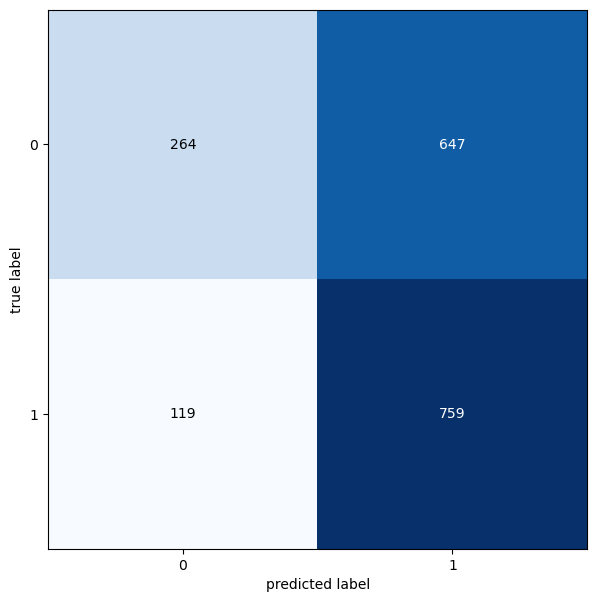

In [179]:
from torchmetrics import ConfusionMatrix
# plot_confusion_matrix will plot the metrix in a nicer way
from mlxtend.plotting import plot_confusion_matrix

model_0.eval()
with torch.inference_mode():
    X= inputs_tensor_test.to(device)
    y= targets_tensor_test.to(device)

    # Predict for test data
    test_logits= model_0(X).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))
    
    # Calculate test loss/accuracy
    test_loss+= loss_fn(test_logits, y)
    test_accuracy+= accuracy_fn(test_pred, y)


confmat= ConfusionMatrix(task='binary')

# test_data.targets are the values we want to predict in the test dataloader
confmat_tensor= confmat(
  preds= test_pred.cpu(),
  target= targets_tensor_test.cpu())

# Plot the confusion matrix
fig, ax= plot_confusion_matrix(
  conf_mat= confmat_tensor.numpy(),
  figsize= (10, 7)
)


In [180]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary  


In [181]:
summary(model_0, input_size=[len(signal_windows)])

Layer (type:depth-idx)                   Output Shape              Param #
StockModelBinaryV0                       [1]                       --
├─Sequential: 1-1                        [1]                       --
│    └─Linear: 2-1                       [80]                      2,080
│    └─Tanh: 2-2                         [80]                      --
│    └─Linear: 2-3                       [40]                      3,240
│    └─Tanh: 2-4                         [40]                      --
│    └─Linear: 2-5                       [20]                      820
│    └─Tanh: 2-6                         [20]                      --
│    └─Linear: 2-7                       [10]                      210
│    └─Tanh: 2-8                         [10]                      --
│    └─Linear: 2-9                       [1]                       11
Total params: 6,361
Trainable params: 6,361
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.31
Input size (MB): 0.00
Forward/backward 